In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier



In [2]:


with open("jimin1.csv", 'r', encoding="utf-8") as read_: #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    text=read_.readlines()

rows=[]
for i in text[1:]:
    rows.append(list(map(int,i.split(",")))) # 이름으로 끝나기 때문에 , 가 없다 그래서 -1로 슬라이싱 해준다.
print(i)

df=pd.DataFrame(rows)
df.columns=["sensor%d"%i for i in range(1,18)]

with open("seong2.csv", 'r', encoding="utf-8") as read_:
    text2=read_.readlines()
#성훈= 레이블값2

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(","))))
print(i)

with open("yeon2.csv", 'r', encoding="utf-8") as read_:
    text3=read_.readlines()
# 연우 레이블값 0 
rows9=[]
for i in text3[1:]:
    rows9.append(list(map(int,i.split(","))))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,18)]


df3=pd.DataFrame(rows9)
df3.columns=["sensor%d"%i for i in range(1,18)]

# 

with open("yeon3.csv", 'r', encoding="utf-8") as read_:
    text4=read_.readlines()
    
rows111=[]
for i in text4[1:]:
    rows111.append(list(map(int,i.split(","))))
print(i)

df4=pd.DataFrame(rows111)
df4.columns=["sensor%d"%i for i in range(1,18)]


#
with open("jimin3.csv", 'r', encoding="utf-8") as read_:
    text5=read_.readlines()
    
rows110=[]
for i in text5[1:]:
    rows110.append(list(map(int,i.split(","))))
print(i)

df5=pd.DataFrame(rows110)
df5.columns=["sensor%d"%i for i in range(1,18)]

#
with open("seong3.csv", 'r', encoding="utf-8") as read_:
    text6=read_.readlines()
    
rows100=[]
for i in text6[1:]:
    rows100.append(list(map(int,i.split(","))))
print(i)

df6=pd.DataFrame(rows100)
df6.columns=["sensor%d"%i for i in range(1,18)]

 16, 19, 23, 27, 34, 36, 40, 44, 41, 46, 48, 51, 56, 58, 58, 62,2
 79, 80, 80, 80, 82, 81, 81, 81, 78, 80, 79, 79, 80, 83, 82, 82,0

 0, 0, 6, 11, 20, 24, 30, 33, 34, 40, 42, 45, 49, 53, 56, 59,1

 51, 45, 35, 29, 17, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,2

 0, 0, 0, 4, 11, 16, 21, 28, 26, 32, 36, 39, 49, 43, 52, 52,2

 15, 16, 12, 12, 11, 7, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0,2


In [3]:
df4

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,414,385,337,303,268,250,227,201,174,144,127,117,94,85,71,63,2
1,751,725,688,654,633,603,582,548,532,509,483,472,451,437,428,402,2
2,209,216,225,233,234,240,238,242,232,234,236,232,229,235,230,237,2
3,0,0,0,0,11,13,13,24,20,24,28,27,39,36,34,43,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,740,687,638,597,558,531,499,476,437,410,401,364,355,322,313,294,2
258,775,736,719,692,664,648,617,602,580,563,548,530,516,497,467,431,2
259,63,66,66,94,86,95,89,95,106,111,118,109,115,120,122,131,2
260,0,0,0,3,0,6,7,16,19,6,23,22,25,27,23,27,2


In [4]:
df4.sensor17 =1

In [5]:
df4

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,414,385,337,303,268,250,227,201,174,144,127,117,94,85,71,63,1
1,751,725,688,654,633,603,582,548,532,509,483,472,451,437,428,402,1
2,209,216,225,233,234,240,238,242,232,234,236,232,229,235,230,237,1
3,0,0,0,0,11,13,13,24,20,24,28,27,39,36,34,43,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,740,687,638,597,558,531,499,476,437,410,401,364,355,322,313,294,1
258,775,736,719,692,664,648,617,602,580,563,548,530,516,497,467,431,1
259,63,66,66,94,86,95,89,95,106,111,118,109,115,120,122,131,1
260,0,0,0,3,0,6,7,16,19,6,23,22,25,27,23,27,1


In [6]:
df = df.iloc[:255,]

In [7]:
df4 = df4.iloc[:255,]
df5 = df5.iloc[:255,]
df6 = df6.iloc[:255,]

In [8]:
df6.sensor17 = 0 

In [9]:
df6

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,700,668,630,600,575,543,518,494,466,445,421,405,387,367,355,333,0
1,161,165,155,157,164,160,169,160,162,164,161,169,169,169,172,168,0
2,0,0,0,8,20,23,30,36,39,41,46,52,58,60,63,57,0
3,0,0,0,0,9,7,19,19,16,24,20,28,37,40,44,40,0
4,552,511,472,434,406,372,346,322,290,271,247,231,213,196,184,173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,176,168,163,146,136,118,103,93,69,59,46,39,38,32,24,28,0
251,759,717,679,639,607,577,545,515,481,457,441,418,394,371,350,338,0
252,477,453,429,409,397,380,369,348,340,321,315,302,279,272,260,278,0
253,20,22,31,45,50,59,61,65,66,66,73,71,77,84,79,85,0


In [10]:
df5

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,0,0,0,7,13,12,30,26,38,35,39,51,51,65,72,62,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,611,558,512,475,440,408,378,344,314,291,266,249,225,207,184,168,2
3,769,742,701,666,637,593,559,531,499,480,450,436,422,411,398,385,2
4,128,128,134,126,121,134,123,131,126,135,145,158,162,172,172,177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,7,10,19,29,19,31,35,36,42,44,49,53,61,2
251,0,0,0,0,0,0,0,0,0,0,0,0,3,11,18,20,2
252,648,585,546,497,456,431,392,364,332,306,282,263,245,225,202,188,2
253,762,727,688,659,625,587,551,516,492,457,442,418,408,392,374,372,2


In [11]:
df6

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,700,668,630,600,575,543,518,494,466,445,421,405,387,367,355,333,0
1,161,165,155,157,164,160,169,160,162,164,161,169,169,169,172,168,0
2,0,0,0,8,20,23,30,36,39,41,46,52,58,60,63,57,0
3,0,0,0,0,9,7,19,19,16,24,20,28,37,40,44,40,0
4,552,511,472,434,406,372,346,322,290,271,247,231,213,196,184,173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,176,168,163,146,136,118,103,93,69,59,46,39,38,32,24,28,0
251,759,717,679,639,607,577,545,515,481,457,441,418,394,371,350,338,0
252,477,453,429,409,397,380,369,348,340,321,315,302,279,272,260,278,0
253,20,22,31,45,50,59,61,65,66,66,73,71,77,84,79,85,0


In [12]:
# 20 행마다 잘라서 여러개의 데이터 셋 으로 만들기

In [13]:
df2 = df2.iloc[:255,]
df2

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,0,5,12,17,24,32,33,41,35,43,46,49,52,55,56,57,0
1,75,76,77,78,83,83,82,84,82,81,82,82,83,84,84,85,0
2,80,84,82,83,85,85,84,85,81,83,84,83,87,87,87,87,0
3,747,699,657,617,583,550,517,491,460,438,410,390,371,353,338,322,0
4,450,423,398,377,358,340,322,305,287,275,262,250,241,232,221,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,69,72,74,79,77,82,81,81,78,79,82,81,85,90,86,89,0
251,49,50,53,55,59,62,66,67,66,66,69,71,74,74,76,77,0
252,151,143,142,138,136,131,128,125,117,116,112,112,111,109,107,107,0
253,176,170,165,161,154,151,146,142,134,133,127,126,124,121,116,113,0


In [14]:
df3 = df3.iloc[:255,]
df3

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,58,60,62,64,66,68,71,71,68,70,72,72,76,76,77,78,1
1,100,99,97,99,100,99,98,103,93,94,92,91,92,92,92,92,1
2,62,63,67,67,71,72,73,74,73,75,76,77,80,80,79,81,1
3,76,76,78,78,82,82,76,83,75,81,82,82,84,84,84,85,1
4,55,59,61,67,66,68,70,72,70,72,73,74,76,78,79,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,102,102,103,100,103,100,97,98,94,93,93,92,94,96,92,96,1
251,104,105,103,103,104,103,101,103,99,97,97,97,97,97,97,96,1
252,117,115,111,111,111,110,107,105,102,102,101,100,99,98,101,98,1
253,122,120,118,116,117,114,112,111,106,106,103,103,103,102,101,102,1


# It is quite useful to add a hierarchical index (Also known as multi-level index) for more sophisticated data analysis. In this case, let’s add index Year 1 and Year 2 for df1 and df2 respectively. To do that, we can simply specify the keys argument.

In [15]:
# frames = [df,df2,df3]
# df_keys = pd.concat(frames, keys = ['1','2','3'])
# df_keys

In [16]:
frames = [df,df2,df3,df5,df6,df4]
df_keys2 = pd.concat(frames, axis=0) 


In [17]:
df_keys2.shape

(1530, 17)

In [18]:
df_keys2

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17
0,196,189,182,177,171,165,161,156,149,144,140,135,135,132,128,126,2
1,98,100,99,101,100,101,101,100,97,97,98,98,101,101,102,102,2
2,59,64,65,66,69,75,71,74,71,74,75,77,79,79,80,80,2
3,0,6,12,16,24,28,31,37,36,41,43,48,49,54,56,58,2
4,213,203,196,188,183,177,169,164,157,151,146,143,141,137,133,130,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,15,12,17,19,20,39,37,47,42,54,69,66,1
251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
252,653,605,542,508,441,401,370,334,311,269,247,226,209,197,170,145,1
253,771,745,712,685,676,646,631,610,580,560,527,499,469,445,428,416,1


In [19]:
df_keys2.drop(['sensor17'],axis =1 , inplace = True)

In [20]:
df_keys2

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16
0,196,189,182,177,171,165,161,156,149,144,140,135,135,132,128,126
1,98,100,99,101,100,101,101,100,97,97,98,98,101,101,102,102
2,59,64,65,66,69,75,71,74,71,74,75,77,79,79,80,80
3,0,6,12,16,24,28,31,37,36,41,43,48,49,54,56,58
4,213,203,196,188,183,177,169,164,157,151,146,143,141,137,133,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,15,12,17,19,20,39,37,47,42,54,69,66
251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
252,653,605,542,508,441,401,370,334,311,269,247,226,209,197,170,145
253,771,745,712,685,676,646,631,610,580,560,527,499,469,445,428,416


In [21]:
df_keys2 = np.array(df_keys2)

In [22]:
df_keys2.shape

(1530, 16)

In [23]:
xtrain0 = df_keys2.reshape(1530,4,4,1)

In [24]:
xtrain0

array([[[[196],
         [189],
         [182],
         [177]],

        [[171],
         [165],
         [161],
         [156]],

        [[149],
         [144],
         [140],
         [135]],

        [[135],
         [132],
         [128],
         [126]]],


       [[[ 98],
         [100],
         [ 99],
         [101]],

        [[100],
         [101],
         [101],
         [100]],

        [[ 97],
         [ 97],
         [ 98],
         [ 98]],

        [[101],
         [101],
         [102],
         [102]]],


       [[[ 59],
         [ 64],
         [ 65],
         [ 66]],

        [[ 69],
         [ 75],
         [ 71],
         [ 74]],

        [[ 71],
         [ 74],
         [ 75],
         [ 77]],

        [[ 79],
         [ 79],
         [ 80],
         [ 80]]],


       ...,


       [[[653],
         [605],
         [542],
         [508]],

        [[441],
         [401],
         [370],
         [334]],

        [[311],
         [269],
         [247],
        

In [31]:
np.save('/aiffel/aiffel/Mydata/tdata1', xtrain0) # x_save.npy


In [33]:
xload1 = np.load('/aiffel/aiffel/Mydata/tdata1.npy')


In [34]:
xload1


array([[[[196],
         [189],
         [182],
         [177]],

        [[171],
         [165],
         [161],
         [156]],

        [[149],
         [144],
         [140],
         [135]],

        [[135],
         [132],
         [128],
         [126]]],


       [[[ 98],
         [100],
         [ 99],
         [101]],

        [[100],
         [101],
         [101],
         [100]],

        [[ 97],
         [ 97],
         [ 98],
         [ 98]],

        [[101],
         [101],
         [102],
         [102]]],


       [[[ 59],
         [ 64],
         [ 65],
         [ 66]],

        [[ 69],
         [ 75],
         [ 71],
         [ 74]],

        [[ 71],
         [ 74],
         [ 75],
         [ 77]],

        [[ 79],
         [ 79],
         [ 80],
         [ 80]]],


       ...,


       [[[653],
         [605],
         [542],
         [508]],

        [[441],
         [401],
         [370],
         [334]],

        [[311],
         [269],
         [247],
        

In [35]:
xload1.shape

(1530, 4, 4, 1)

In [41]:
np.split(xtrain0, 1530, axis = 0)

[array([[[[196],
          [189],
          [182],
          [177]],
 
         [[171],
          [165],
          [161],
          [156]],
 
         [[149],
          [144],
          [140],
          [135]],
 
         [[135],
          [132],
          [128],
          [126]]]]),
 array([[[[ 98],
          [100],
          [ 99],
          [101]],
 
         [[100],
          [101],
          [101],
          [100]],
 
         [[ 97],
          [ 97],
          [ 98],
          [ 98]],
 
         [[101],
          [101],
          [102],
          [102]]]]),
 array([[[[59],
          [64],
          [65],
          [66]],
 
         [[69],
          [75],
          [71],
          [74]],
 
         [[71],
          [74],
          [75],
          [77]],
 
         [[79],
          [79],
          [80],
          [80]]]]),
 array([[[[ 0],
          [ 6],
          [12],
          [16]],
 
         [[24],
          [28],
          [31],
          [37]],
 
         [[36],
          [

In [39]:
import numpy as np

xt0101 = np.split(xtrain0, 1530, axis = 0)

In [42]:
xt0101.shape

AttributeError: 'list' object has no attribute 'shape'

In [40]:
pd.DataFrame(xt0101)

ValueError: Must pass 2-d input. shape=(1530, 1, 4, 4, 1)

In [148]:
xtrain1 = df_keys2.reshape(102,5,3,16)

In [149]:
xtrain1

array([[[[196, 189, 182, ..., 132, 128, 126],
         [ 98, 100,  99, ..., 101, 102, 102],
         [ 59,  64,  65, ...,  79,  80,  80]],

        [[  0,   6,  12, ...,  54,  56,  58],
         [213, 203, 196, ..., 137, 133, 130],
         [ 57,  58,  60, ...,  77,  78,  79]],

        [[ 84,  84,  86, ...,  94,  94,  94],
         [ 29,  39,  38, ...,  70,  72,  71],
         [ 16,  20,  25, ...,  61,  62,  63]],

        [[ 67,  69,  72, ...,  75,  74,  76],
         [ 90,  84,  89, ...,  88,  89,  89],
         [ 51,  53,  60, ...,  80,  82,  81]],

        [[ 33,  35,  40, ...,  69,  72,  72],
         [ 18,  24,  29, ...,  66,  67,  70],
         [104, 103,  99, ...,  89,  90,  91]]],


       [[[108, 105, 104, ...,  96,  95,  98],
         [ 51,  56,  59, ...,  80,  80,  80],
         [ 93,  93,  95, ...,  91,  90,  91]],

        [[  0,   5,  12, ...,  57,  60,  63],
         [ 73,  73,  73, ...,  80,  80,  80],
         [ 62,  64,  65, ...,  79,  79,  79]],

        [[131, 129

In [150]:
xtrain1 = df_keys2.reshape(102,5,6,8)

In [151]:
xtrain1

array([[[[196, 189, 182, ..., 165, 161, 156],
         [149, 144, 140, ..., 132, 128, 126],
         [ 98, 100,  99, ..., 101, 101, 100],
         [ 97,  97,  98, ..., 101, 102, 102],
         [ 59,  64,  65, ...,  75,  71,  74],
         [ 71,  74,  75, ...,  79,  80,  80]],

        [[  0,   6,  12, ...,  28,  31,  37],
         [ 36,  41,  43, ...,  54,  56,  58],
         [213, 203, 196, ..., 177, 169, 164],
         [157, 151, 146, ..., 137, 133, 130],
         [ 57,  58,  60, ...,  68,  70,  74],
         [ 67,  70,  73, ...,  77,  78,  79]],

        [[ 84,  84,  86, ...,  89,  87,  90],
         [ 88,  88,  90, ...,  94,  94,  94],
         [ 29,  39,  38, ...,  53,  55,  57],
         [ 58,  59,  60, ...,  70,  72,  71],
         [ 16,  20,  25, ...,  43,  44,  41],
         [ 46,  43,  53, ...,  61,  62,  63]],

        [[ 67,  69,  72, ...,  76,  78,  75],
         [ 73,  72,  73, ...,  75,  74,  76],
         [ 90,  84,  89, ...,  90,  89,  88],
         [ 86,  88,  85, ...

In [162]:
y_train1 = df_keys2[:,16]

In [155]:
y_train1.shape

(1530,)

In [163]:
y_train1

array([2, 2, 2, ..., 1, 1, 1])

In [164]:
y_train1[-500:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

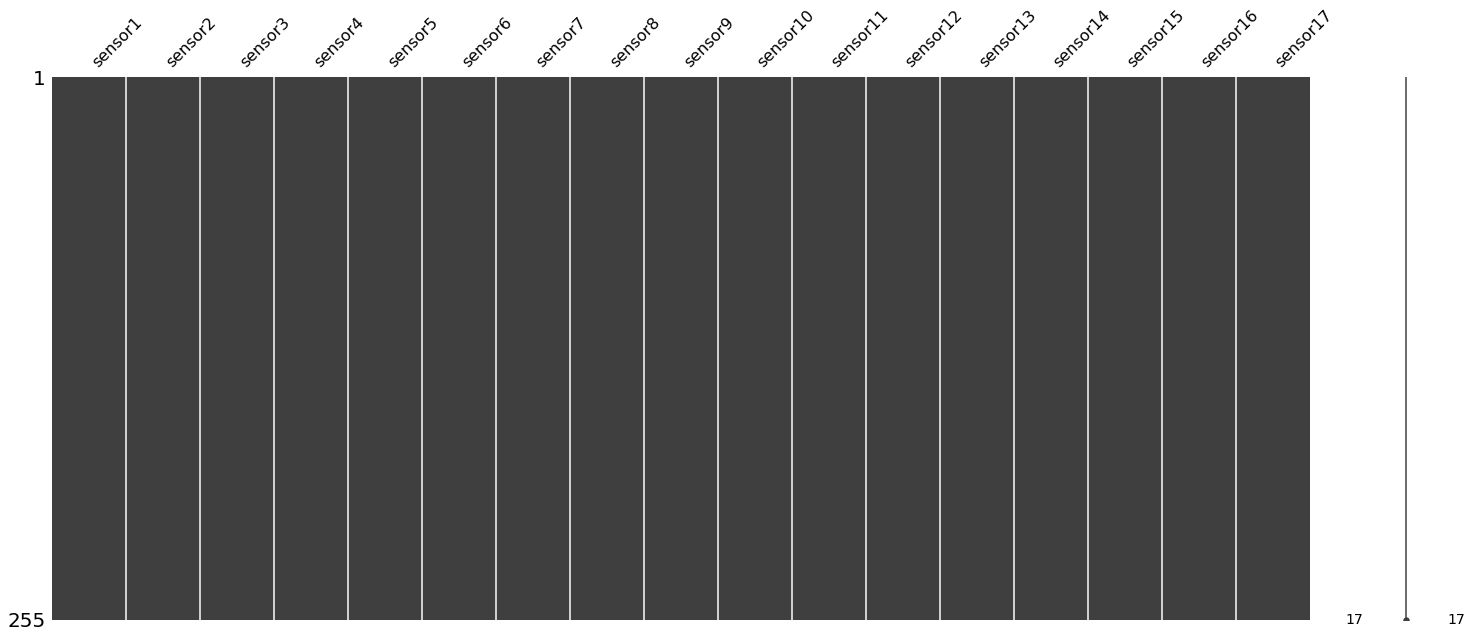

In [158]:
import missingno as msno

msno.matrix(df5)

# msno.matrix(df) 을 통해 결측치가 없음을 확인하였다.



# 해야 할 일


- csv 파일 만들기
- --> 자동으로 data 에 concat 하기
- 그것을 train, test split(주로 train 에 배치)
- test 는 새로 들어온 데이터를 기준으로 함(신원인증 버튼 누르면 1분동안의 새 데이터)
- 레이블링(y_train 의 차원을 x_train 과 맞춰주기 위해서 코딩 필요)
- 자동 레이블링 과정 필요(string(id)-->int)


                            

In [165]:
xtrain1 = xtrain1.flatten()

In [166]:
xtrain1.shape

(24480,)

In [167]:
hh0 = np.array(xtrain1)

In [203]:
hh0.shape

(24480,)

In [169]:
hh0 = hh0.flatten()

In [170]:
hh0.shape

(24480,)

In [205]:
append2 = hh0[:240]

In [212]:
append2.reshape(1,240)

array([[196, 189, 182, 177, 171, 165, 161, 156, 149, 144, 140, 135, 135,
        132, 128, 126,  98, 100,  99, 101, 100, 101, 101, 100,  97,  97,
         98,  98, 101, 101, 102, 102,  59,  64,  65,  66,  69,  75,  71,
         74,  71,  74,  75,  77,  79,  79,  80,  80,   0,   6,  12,  16,
         24,  28,  31,  37,  36,  41,  43,  48,  49,  54,  56,  58, 213,
        203, 196, 188, 183, 177, 169, 164, 157, 151, 146, 143, 141, 137,
        133, 130,  57,  58,  60,  67,  68,  68,  70,  74,  67,  70,  73,
         72,  76,  77,  78,  79,  84,  84,  86,  85,  88,  89,  87,  90,
         88,  88,  90,  93,  93,  94,  94,  94,  29,  39,  38,  45,  48,
         53,  55,  57,  58,  59,  60,  63,  67,  70,  72,  71,  16,  20,
         25,  31,  37,  43,  44,  41,  46,  43,  53,  54,  57,  61,  62,
         63,  67,  69,  72,  72,  76,  76,  78,  75,  73,  72,  73,  72,
         76,  75,  74,  76,  90,  84,  89,  84,  91,  90,  89,  88,  86,
         88,  85,  88,  89,  88,  89,  89,  51,  53

In [214]:
append2 = pd.DataFrame(append2)

In [206]:
hhtrain = hh0[240:19440]

In [211]:
hhtrain.reshape(80,240)

array([[108, 105, 104, ...,  64,  71,  69],
       [  0,   0,   3, ..., 100, 100,  99],
       [ 31,  36,  40, ...,  84,  85,  86],
       ...,
       [750, 704, 652, ...,  21,  17,   3],
       [752, 706, 676, ..., 341, 308, 290],
       [595, 578, 558, ..., 288, 250, 229]])

In [215]:
hhtrain = pd.DataFrame(hhtrain)

In [207]:
hhtest = hh0[19440:]

In [209]:
hhtest.shape

(5040,)

In [210]:
hhtest.reshape(21,240)

array([[754, 718, 679, ..., 103,  86,  83],
       [761, 708, 676, ...,   0,   0,   0],
       [713, 660, 607, ...,  24,  29,  31],
       ...,
       [644, 613, 586, ..., 420, 407, 383],
       [ 74,  90,  88, ..., 416, 417, 403],
       [ 31,  38,  62, ..., 134, 140, 144]])

In [216]:
hhtest = pd.DataFrame(hhtest)

In [217]:
xlist = [hhtrain, hhtest, append2]

hhtrain = pd.concat(xlist, axis = 0)

In [218]:
hhtrain.shape

(24480, 1)

In [221]:
hhtrain = np.array(hhtrain)

In [222]:
hhtrain.reshape(102,5,6,8)

array([[[[108, 105, 104, ..., 102, 102, 100],
         [100,  97,  94, ...,  96,  95,  98],
         [ 51,  56,  59, ...,  69,  70,  71],
         [ 70,  70,  71, ...,  80,  80,  80],
         [ 93,  93,  95, ...,  92,  95,  93],
         [ 90,  91,  89, ...,  91,  90,  91]],

        [[  0,   5,  12, ...,  30,  34,  39],
         [ 40,  45,  51, ...,  57,  60,  63],
         [ 73,  73,  73, ...,  78,  76,  76],
         [ 74,  76,  74, ...,  80,  80,  80],
         [ 62,  64,  65, ...,  71,  74,  74],
         [ 66,  74,  73, ...,  79,  79,  79]],

        [[131, 129, 124, ..., 121, 118, 116],
         [111, 109, 108, ..., 106, 104, 103],
         [124, 121, 120, ..., 120, 116, 116],
         [110, 113, 110, ..., 109, 108, 106],
         [ 34,  37,  42, ...,  54,  55,  58],
         [ 57,  62,  62, ...,  70,  71,  73]],

        [[ 24,  29,  34, ...,  46,  49,  51],
         [ 50,  51,  55, ...,  64,  66,  69],
         [ 47,  52,  52, ...,  62,  62,  64],
         [ 63,  64,  65, ...

In [225]:
hhtrain = hhtrain.flatten()

In [226]:
hhtrain.shape

(24480,)

In [227]:
hht = hhtrain[:19200]

In [228]:
hht2 = hhtrain[19200:]

# 80개는 테스트, 27개는 훈련 데이터 세트로...

In [229]:
hhinput = hht.reshape(80,5,6,8)

In [231]:
hhinput.shape

(80, 5, 6, 8)

In [232]:
hhtest = hht2.reshape(22,5,6,8)

In [233]:
hhtest

array([[[[754, 718, 679, ..., 598, 569, 539],
         [523, 499, 472, ..., 419, 405, 384],
         [246, 242, 240, ..., 223, 221, 218],
         [219, 218, 222, ..., 228, 226, 232],
         [  0,   0,   1, ...,  19,  23,  32],
         [ 37,  46,  48, ...,  58,  65,  65]],

        [[  0,   0,   0, ...,   5,   4,   5],
         [  6,  12,  20, ...,  26,  26,  36],
         [505, 469, 431, ..., 332, 300, 278],
         [252, 225, 205, ..., 146, 132, 118],
         [755, 728, 696, ..., 592, 573, 549],
         [525, 500, 471, ..., 426, 399, 382]],

        [[263, 265, 252, ..., 247, 243, 241],
         [238, 233, 238, ..., 238, 231, 235],
         [  0,   0,   0, ...,  30,  36,  37],
         [ 39,  40,  50, ...,  62,  55,  64],
         [  0,   0,   0, ...,   0,   5,  14],
         [ 12,  17,  15, ...,  30,  36,  36]],

        [[463, 433, 387, ..., 289, 272, 233],
         [219, 193, 175, ..., 134, 115, 109],
         [760, 734, 692, ..., 602, 570, 541],
         [511, 485, 468, ...

# hhinput 은 x train data, hhtest 는 test data 로 활용 

In [178]:
hhinput[:,16]

IndexError: index 16 is out of bounds for axis 1 with size 5

# 이건 에러뜬게 당연한것이다

In [234]:
y_train1.shape

(1530,)

In [235]:
ylabel = y_train1[0:1530:15]

In [236]:
ylabel.shape

(102,)

In [237]:
ylabel

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [239]:
ylabel = ylabel[1:102]

In [241]:
a2 = [2]

In [244]:
lli = [ylabel,a2]
ylabel = np.append(ylabel,a2, axis = 0)

In [245]:
ylabel

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [302]:
y_train = ylabel[0:80]

In [303]:
y_test = ylabel[80:]

In [304]:
y_test.shape

(22,)

In [305]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [306]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#예제

#
#(raw_train, raw_validation, raw_test), metadata = tfds.load(
 #   'cats_vs_dogs',
 #   split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
 #   with_info=True,
 #   as_supervised=True,
# #)
# x_train, x_test, y_train, y_test = train_test_split(df2, y, test_size = 0.4,random_state=42) 
#1). X_train - 여기에는 모든 독립 변수가 포함되며 우리가 지정한 대로 모델을 훈련하는 데 사용되며, 완전한 데이터의 이 관찰 test_size = 0.4수단 60%은 모델을 훈련/적합하는 40%데 사용되고 나머지는 테스트에 사용됩니다. 모델.
#2). X_test40% - 학습 단계에서 사용되지 않고 모델의 정확도를 테스트하기 위한 예측을 수행하는 데 사용되는 데이터의 독립 변수의 나머지 부분입니다.
#3). y_train - 이것은 이 모델에 의해 예측되어야 하는 종속 변수입니다. 여기에는 독립 변수에 대한 범주 레이블이 포함됩니다. 모델을 훈련/피팅하는 동안 종속 변수를 지정해야 합니다.
#4). y_test - 이 데이터에는 테스트 데이터에 대한 범주 레이블이 있으며, 이 레이블은 실제 범주와 예측 범주 간의 정확도를 테스트하는 데 사용됩니다.



(x_train, y_train), (x_test, y_test) = (hhinput, y_train  ),(hhtest, y_test)
# x_train, x_test, y_train, y_test = train_test_split(data, y_train, random_state=random_state, test_size=0.2)

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 80 x_test: 22


In [251]:
y_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [252]:
y_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])


# 최대한 많은 데이터 확보가 중요함!!!
# 밑의 CNN 모델을 쓸 것입니다 


In [332]:
img_input = keras.Input(shape=(5,6,8))  # (a,b,c) a는 개수, b는 row ,
# c는 column c는 dense 출력층 개수와 똑같아야한다 


x = keras.layers.Conv2D(512, (3,3),padding="same",activation='relu')(img_input) #256 filters, 5 kernel size, window stride 1 (defalut)
x = keras.layers.BatchNormalization(axis = -1)(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)
x = keras.layers.Conv2D(64, (3,3), padding="same",activation='relu')(x)
x = keras.layers.BatchNormalization(axis = 1)(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)
x = keras.layers.Conv2D(32, (1,1), padding="same",activation='relu')(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)
x = keras.layers.Conv2D(16, (1,1),padding="same", activation='relu')(x)
x = keras.layers.MaxPool2D(2, padding= 'same')(x)



x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)



x = keras.layers.Flatten()(x)
predictions = keras.layers.Dense(3, activation='softmax')(x) 

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 5, 6, 8)]         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 5, 6, 512)         37376     
_________________________________________________________________
batch_normalization_55 (Batc (None, 5, 6, 512)         2048      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 3, 3, 64)          294976    
_________________________________________________________________
batch_normalization_56 (Batc (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 2, 64)          0   

# !!!!!!!!!!!!!!!!!!!!! 모델 학습 !!!!!!!!!!!!!!!!!!!!!!!!



In [284]:
ylabel

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

# 원 핫 인코딩

In [308]:
from tensorflow.keras.utils import to_categorical


one_hot_encode = to_categorical(y_train)

In [309]:
one_hot_encode.shape

(80, 3)

In [310]:
y_test.shape

(22,)

In [311]:

one1 = to_categorical(y_test)

In [312]:
one1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [313]:
one1.shape

(22, 3)

In [291]:

from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)

In [292]:
# Identity Block
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(IdentityBlock, self).__init__(name='')
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.add([x, inputs])
        x = self.relu(x)
        return x

In [293]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(48, (5,5), padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((2, 2))
        self.id1a = IdentityBlock(48, 3)
        self.id1b = IdentityBlock(48, 3)
        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')
    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.id1a(x)
        x = self.id1b(x)
        x = self.global_pool(x)
        return self.classifier(x)

In [294]:
x_train = x_train.astype('float64')
one_hot_encode = one_hot_encode.astype('float64')
x_test = x_test.astype('float64')
one1 = one1.astype('float64')

In [333]:
resnet = ResNet(3)
resnet.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics =['acc'])

resnet.fit(x_train, one_hot_encode, epochs=55)
resnet.evaluate(x_test, one1)

Epoch 1/55
3/3 [==============================] - 1s 6ms/step - loss: 0.9312 - acc: 0.5500
Epoch 2/55
3/3 [==============================] - 0s 5ms/step - loss: 0.6861 - acc: 0.6250
Epoch 3/55
3/3 [==============================] - 0s 6ms/step - loss: 0.6576 - acc: 0.6875
Epoch 4/55
3/3 [==============================] - 0s 5ms/step - loss: 0.6434 - acc: 0.6250
Epoch 5/55
3/3 [==============================] - 0s 5ms/step - loss: 0.6183 - acc: 0.6625
Epoch 6/55
3/3 [==============================] - 0s 5ms/step - loss: 0.5711 - acc: 0.6625
Epoch 7/55
3/3 [==============================] - 0s 5ms/step - loss: 0.5103 - acc: 0.7375
Epoch 8/55
3/3 [==============================] - 0s 5ms/step - loss: 0.4926 - acc: 0.8125
Epoch 9/55
3/3 [==============================] - 0s 5ms/step - loss: 0.4686 - acc: 0.8250
Epoch 10/55
3/3 [==============================] - 0s 5ms/step - loss: 0.4171 - acc: 0.8125
Epoch 11/55
3/3 [==============================] - 0s 6ms/step - loss: 0.3844 - acc: 0.86

[7.7198381423950195, 0.1818181872367859]

# https://junstar92.tistory.com/146
# resnet 모델이 작은 cnn 모델에 비해 정확도가 떨어짐을 확인하였다

In [329]:
x_train = x_train.astype('float64')
one_hot_encode = one_hot_encode.astype('float64')
x_test = x_test.astype('float64')
one1 = one1.astype('float64')

In [270]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.9, monitor='val_loss', patience=1, verbose=2, min_lr=1e-8)


https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCmP3l%2FbtqS4MbpE7k%2F7hXIKRJlpOgtRmtW5fZQKK%2Fimg.png

In [334]:
# 모델 학습!! 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, 
                                                 beta_1=0.9, 
                                                 beta_2=0.999, 
                                                 epsilon=1e-07, 
                                                 amsgrad=False,),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history1 = model.fit(x_train, one_hot_encode, epochs=11,callbacks=[lr_scheduler])#Epoch만 학습합니다.
# 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌

test_loss, test_accuracy = model.evaluate(x_test, one1, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Epoch 1/11
3/3 [==============================] - 1s 52ms/step - loss: 1.1449 - accuracy: 0.3500
Epoch 2/11
3/3 [==============================] - 0s 5ms/step - loss: 0.9154 - accuracy: 0.4875
Epoch 3/11
3/3 [==============================] - 0s 4ms/step - loss: 0.8361 - accuracy: 0.5750
Epoch 4/11
3/3 [==============================] - 0s 4ms/step - loss: 0.7496 - accuracy: 0.6500
Epoch 5/11
3/3 [==============================] - 0s 4ms/step - loss: 0.7293 - accuracy: 0.5875
Epoch 6/11
3/3 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.6625
Epoch 7/11
3/3 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.6750
Epoch 8/11
3/3 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.6875
Epoch 9/11
3/3 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 0.6875
Epoch 10/11
3/3 [==============================] - 0s 5ms/step - loss: 0.6348 - accuracy: 0.7375
Epoch 11/11
1/1 [=====================

In [315]:
predictions1 = model.predict(x_test)

In [316]:
predictions1.shape

(22, 3)

In [317]:
predictions1

array([[9.99944210e-01, 4.35989563e-07, 5.52719976e-05],
       [9.99989510e-01, 9.02060890e-07, 9.55713404e-06],
       [9.99879718e-01, 6.84440874e-06, 1.13446848e-04],
       [9.99867916e-01, 1.03092145e-06, 1.31000925e-04],
       [9.99944687e-01, 4.05884009e-07, 5.49474353e-05],
       [9.99997020e-01, 4.82034821e-08, 2.93954668e-06],
       [9.99705136e-01, 1.50505343e-06, 2.93269724e-04],
       [5.11441249e-05, 2.32687555e-04, 9.99716103e-01],
       [9.15497065e-01, 5.27698248e-05, 8.44501257e-02],
       [9.99986887e-01, 7.36811103e-07, 1.24497064e-05],
       [9.99980688e-01, 3.21058405e-06, 1.61463813e-05],
       [9.99954700e-01, 1.29315950e-07, 4.51680426e-05],
       [9.99995351e-01, 7.20241999e-09, 4.65065568e-06],
       [9.99989271e-01, 6.81838657e-08, 1.05608869e-05],
       [9.99996185e-01, 2.06940332e-08, 3.84440000e-06],
       [9.99992847e-01, 1.48671930e-07, 7.06791707e-06],
       [9.99881983e-01, 1.60510388e-06, 1.16500720e-04],
       [9.99968290e-01, 1.81876

In [318]:

pd1 = tf.argmax(predictions1)

In [277]:
pd1

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([14, 21,  7])>

In [278]:
one1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [279]:
one_hot_encode

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [337]:
# 모델 학습!! 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, 
                                                 beta_1=0.9, 
                                                 beta_2=0.999, 
                                                 epsilon=1e-07, 
                                                 amsgrad=False,),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, one_hot_encode, epochs=65)#Epoch만 학습합니다.
# 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌

test_loss, test_accuracy = model.evaluate(x_test, one1, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/65
3/3 [==============================] - 1s 5ms/step - loss: 0.2075 - accuracy: 0.9375
Epoch 2/65
3/3 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.9125
Epoch 3/65
3/3 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.9375
Epoch 4/65
3/3 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9250
Epoch 5/65
3/3 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.9625
Epoch 6/65
3/3 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 0.9250
Epoch 7/65
3/3 [==============================] - 0s 4ms/step - loss: 0.1241 - accuracy: 0.9375
Epoch 8/65
3/3 [==============================] - 0s 5ms/step - loss: 0.1231 - accuracy: 0.9625
Epoch 9/65
3/3 [==============================] - 0s 5ms/step - loss: 0.1547 - accuracy: 0.9250
Epoch 10/65
3/3 [==============================] - 0s 4ms/step - loss: 0.1831 - accuracy: 0.8875
Epoch 11/65
3/3 [======================

In [232]:
# # 모델 학습!! 
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
#               loss='binary_crossentropy',
#               #sparse_categorical_crossentropy쓰면 안됨
#               metrics = [
#                 'accuracy',
#                 tf.keras.metrics.Precision(name='precision'),
#                 tf.keras.metrics.Recall(name='recall')
#                 ])


# model.fit(x_train, y_train, epochs=100)    # 66 Epoch만 학습합니다.
# # 오류는 dense 의 아웃풋 형태를 조절할 것 여기에서는 17로 줌


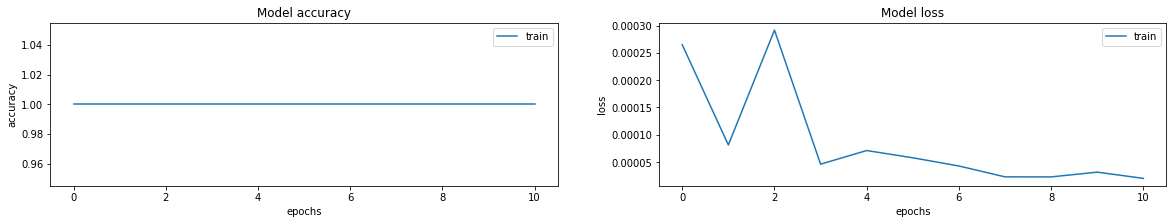

In [234]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history1.history[met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# 테스트 데이터로 정확도 뽑는 밑 코드 

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test = y_test.astype(int)

In [ ]:
y_test = y_test - 1
print(y_test)

     level_0
45         2
46         2
47         2
48         2
49         2
..       ...
115        2
116        2
117        2
118        2
119        2

[75 rows x 1 columns]


In [ ]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [ ]:
x_test1

array([64., 65., 65., ..., 60., 62., 66.])

In [ ]:
x_test1 = x_test1.to_numpy()

In [ ]:
x_test1 = x_test1.flatten()
x_test2 = x_test1[:1125]

In [ ]:
x_test2 = x_test2.reshape(75,5,1,3)

In [ ]:
x_test1 = x_test.drop('level_0', axis = 1)

y_test = x_test.level_0

In [ ]:
y_test = y_test.astype('float')
test_scores = model.evaluate(x_test2, y_test, verbose=3)

In [ ]:
print("test loss, test acc:" , test_scores ) 

test loss, test acc: [5.173856735229492, 0.03999999910593033]


# 테스트 결과값입니다 3.9퍼센트 예측(학습데이터에서 사람2명의 데이터가 대다수, 사람3의 데이터로 학습해보니 현저히 정확도가 낮게 나옴) 을 확인하였습니다 

# 위 코드 까지 완벽?하게 먼저 해내기(cnn 돌리기)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)



In [ ]:
# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)

# roc_auc_score(rows4, rows5, average=None)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)


#열이 16개인 데이터셋


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


# 데이터셋 로드하기
# [[your code]
data = rows
data2 = rows2
data9 = rows9
# 훈련용 데이터셋 나누기
# [[your code]
X_train = rows[:14]
X_test = rows[14:]

y_train = data9[:14]
y_test = data9[14:]

z_train = data9[:14]

print("y_train")
print(y_train)
print('-'*90)
print('-'*90)
print("X_train")
print(X_train)
# y_test2 = data2[:16]
# y_test2 = y_test2.reshape(16,4)
# 훈련하기
# [[your code]
print('-'*90)
print('-'*90)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
# X2, y2 = make_classification(n_samples=1000, n_features=4,
#                              n_informative=2, n_redundant=0,
#                              random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X2, y2)
# print(X2)
# print('-/'*90)
# print('-/'*90)
xtt = np.array(X_train)
xt = xtt.reshape(-1,)
ytt = np.array(y_train) #numpy array 로 바꿈!!
yt = ytt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
ett = np.array(y_test)  
ettt = ett.reshape(-1,)
zt = np.array(z_train)

print("xt : X_train 에 해당")
print(xt)
print('-'*90)
print("yt: y_train 에 해당 ")
print(yt)
print('-'*90)
print("ett : y_test 에 해당")
print(ettt)
print('-'*90)

xt = np.expand_dims(xt, axis=0) # 차원 확대
yt = np.expand_dims(yt, axis=0) # 차원 확대 
xt0909 = np.expand_dims(xt, axis=0)
np.expand_dims(yt, axis=0)
print("xt0909")
print(xt0909)
print("xt")
print(xt)
print('-'*90)
print("yt")
print(yt)
print('-'*90)
print('-*'*90)
# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(xt,yt) # 2차원 이상의 배열이 필요함...
knn = KNeighborsClassifier(n_neighbors=88)#여기에서 n_neighbers =1 이 중요!!! 입력 데이터 형태를 보면 1로 해야함
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=1)).fit(xt,yt) #2차원 필요
print("knn 예측치")
knnmaster1 = knn.predict(xt[-2:]) #We select the training set with the [:-1] Python syntax,
#which produces a new array that contains all but the last item from digits.data:
print("knmaster1")
print(knnmaster1)
print('-*'*90)


print("정답률=", knn.score(yt, xt)) ###########################


print('-*'*90)
model = RandomForestClassifier()
model.fit(xt, yt)
print('-'*90)
# 예측하기
# [[your code]
y_pred1 = model.predict(xt)
# 정답률 출력하기
# [[your code]
print("randomforest 예측치 : " )
print(y_pred1)

print('-'*90)


decision_tree = DecisionTreeClassifier(random_state=255,min_samples_split=5,max_depth=6)
decision_tree.fit(xt, yt)
y_pred2 = decision_tree.predict(xt)
print("Decision Tree classifier 예측치")
print(y_pred2)
print('-'*90)

y_testt = np.transpose(y_test)
print(y_test)
print('-'*90)
#y_test = np.expand_dims(y_test, axis=0)

print('decision tree 테스트 : y_test')
print(y_test)
print('-'*90)
print('decision tree 예측치 : y_pred1')
print(y_pred1)
print('-'*90)
print('-'*90) 
#svm 은 y 가 1차원이어야 한다고 한다.
yt2 = yt.reshape(-1,) # numpy array 차원 축소!!! 1차원으로 만들어주기
xt2 = xt.reshape(-1,)
xt3 = xt2.reshape(-1, 1)
yt3 = yt2.reshape(-1, 1) #조진호(사람2) 데이터            
ett2 = ett.reshape(-1,)
ett3 = ett.reshape(-1, 1) #최주원(사람3) 데이터
zt3 = zt.reshape(-1,)
zt3 = zt.reshape(-1,1)

print("zt3")
print(zt3)
print('--'*60)
print("xt2 : xt를 reshape 으로(-1,) 한 결과 ")
print(xt2)
print('--'*90)
print("xt3 : xt2를 reshape 으로 (-1,1)한 결과 ")
print(xt3)
print('--'*90)
from sklearn import svm

print('-'*90)
print('-'*90)


ett4 =ett3.reshape(-1,)
yt33 = yt3.reshape(-1,) #차원축소
xt33 = xt3.reshape(-1,)

print('--'*90)

yt4 = yt3.reshape(-1,)
ett3= ett3.reshape(-1,)

print(ett4)
yt5 = yt4[:96]

accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


In [ ]:


print("정확도 계산중... ")
print(" 정확도는 다음과 같다 ")
print(accuracy*100)
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])
yt999 = yt3.reshape(-1,1)
ytridge2 = yt999.reshape(-1,)
xt35 = xt3.reshape(-1,1)
# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

from sklearn.linear_model import RidgeClassifierCV
clf = RidgeClassifierCV(cv = 5, normalize = True,).fit(xt35 , yt999) #1d array 필요 .ravel() 써서 평평하게 함 
y_score = clf.decision_function(yt999) #2d array 필요 
print("ridgeclassifier 스코어")
print(y_score)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
fig = plt.figure(figsize=(6, 6))


# clf9 = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
ett999 = ett3.reshape(-1,1)

gbrt = GradientBoostingClassifier(learning_rate=0.1,n_estimators =650,max_leaf_nodes=None, random_state=0,max_depth=6)
gbrt.fit(xt3, yt3)
print("gbrt결정 함수의 결과 형태: {}".format(gbrt.decision_function(yt999).shape))#2차원 요구--> ett3
# plot the first few entries of the decision function
print("gbrt결정 함수 결과:\n{}".format(gbrt.decision_function(yt999)[:6, :]))
print('/*/'*90)
print("gbrt가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(yt999), axis=1)))
print("gbrt예측:\n{}".format(gbrt.predict(yt999)))
print("gbrt 스코어")
print(gbrt.score(xt3,yt3))

# 가장 큰 결정 함수의 인덱스:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
# 예측:
# [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
#  0]
print('/*/'*90)
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(yt999)[:9]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(yt999)[:9].sum(axis=1)))
# 예측 확률:
# [[0.10664722 0.7840248  0.10932798]
#  [0.78880668 0.10599243 0.10520089]
#  [0.10231173 0.10822274 0.78946553]
#  [0.10664722 0.7840248  0.10932798]
#  [0.10825347 0.66344934 0.22829719]
#  [0.78880668 0.10599243 0.10520089]]
# 합: [1. 1. 1. 1. 1. 1.]
print('/*/'*90)
x8x8 = pd.DataFrame(gbrt.decision_function(ett999))

x9x9 = x8x8.corr()

e9e9 = sns.heatmap(x9x9, cmap = 'viridis')

e0e0 = sns.scatterplot(xt33,yt33)
plt.show()
print('/*/'*90)
print(e0e0)
print('/*/'*90)

x88x88 = pd.DataFrame(gbrt.decision_function(yt999))
x99x99 = x88x88.corr()
e99e99 = sns.heatmap(x99x99, cmap = 'viridis')
# e0e0 = sns.scatterplot(xt33,yt33)
plt.show()

print(e99e99)





xt39 = np.transpose(xt3)
yt39 = np.transpose(yt3)
ett39 = np.transpose(ett3)
zt39 = np.transpose(zt3)
print("zt39")
print(zt39.shape)
print(zt39)
print('/*/'*90)
s = [0.7*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale
print("ett3.shape")
print(ett3.shape)
print('/*/'*90)
print("xt39.shape :xt39 = np.transpose(xt3)")
print(xt39.shape)
print('/*/'*90)
print("xt39")
print(xt39)


In [ ]:

ax= plt.scatter(xt39[:300], yt39[:300], c=s, s=30, cmap=plt.cm.Paired)
clf = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.2,
  kernel='rbf', shrinking=True, tol=0.001)#파이프라인만들기

clf.fit(xt3,yt3) #2차원으로 fit X(왼쪽 xt3)에는 포인트가 있고 Y에는 해당 포인트가 속한 클래스가 있습니다.

# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
print("XX.shape :np.meshgrid(yy, xx)")
print(XX.shape)



xy = np.vstack([XX.ravel(), YY.ravel()]).T
print("xy.shape : np.vstack([XX.ravel(), YY.ravel()]).T ")
print(xy.shape)
xy = xy.reshape(-1,1)


xy1 = xy[:30]
xy1 = xy1.flatten()
xy1 = xy1[:899]
print("xy1")
print(xy1)
xy1 = xy1.reshape(-1,1)#$$$
xy2 = xy1[:30]#$$$
xy3 = xy2.flatten()#$$$
print("xy3")
print(xy3)
xy3 = xy3[:30]
xy99 = xy3.reshape(30,)#$$$
print("xy3")
print(xy3)
xy5= xy99.reshape(-1,1)#$$$
# print("clfdecisionfuction")
# print(fig.add_subplot(112, clf.decision_function(xy5)))
# Z = clf.decision_function(xy5).reshape(30,30)
# Z = clf.decision_function(xy5).reshape(-1,)#1차원으로 만들기
# print(Z)
# Z = Z[:900] # 900개까지 나열
# Z = Z.reshape(30,30) #30*30 행렬로 reshape
# ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.9, linestyles=['--', '-', '--'])
# # 지지벡터(Support Vector) 표현 
# ax.scatter(clf.support_vectors_[:,1], clf.support_vectors_[:,1], s=60, facecolors='r')
# plt.show()
# fig = plt.figure(figsize=(12, 12))


# ax2 = fig.add_subplot(111, projection='3d')
# ax2.scatter(xt39[:100], yt39[:100], yt39[:100], c= s , marker='o', s=15, cmap='Greens')

# print(yt3.shape)
# yt4 = yt3.reshape(-1,)
# print(yt4)
# print("ett4")
# print(ett4)
# yt5 = yt4[:96]
# print("yt5")
# print(yt5)
# accuracy = accuracy_score(ett4, yt5) #같은 shape 이어야 함. accuracy 랑 다른게 있다. 


# print("정확도 계산중... ")
# print(" 정확도는 다음과 같다 ")
# print(accuracy*100)



In [ ]:
from sklearn import svm
# from sklearn.datasets import make_blobs
# import matplotlib.pyplot as plt

# X,y = make_multilabel_classification(n_classes= 3,random_state = 0)

# clf.predict(X[-2:])


# knn = KNeighborsClassifier(n_neighbors=3)
# classifier = MultiOutputClassifier(knn, n_jobs=-1)
# classifier.fit(y_test,y_pred)
# predictions = classifier.predict(y_train)
# classifier.score(y_true,np.array(y_train))

# from sklearn.linear_model import RidgeClassifierCV
# clf = RidgeClassifierCV().fit(X_train, y_train)
# y_score = clf.decision_function(X_train)
# roc_auc_score(y_test, y_train, average=None)

# from sklearn.datasets import make_multilabel_classification
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

# X, y = make_multilabel_classification(random_state=0)
# inner_clf = LogisticRegression(solver="liblinear", random_state=0)
# clf = MultiOutputClassifier(inner_clf).fit(X, y)
# y_score = np.transpose([y_pred[:, 1] for y_pred in clf.predict_proba(X)])
# roc_auc_score(y, y_score, average=None)
clf = svm.SVC(kernel="linear", C=1000)
x__train = xt3.reshape(-1,1)
y__train = yt3.reshape(-1,1)

clf.fit(x__train, y__train)
print(xt3.shape)
print(yt3.shape)
s = [0.1*np.linalg.norm([a, b]) for a, b in zip(xt3, yt3)]
s = [a / max(s) for a in s]  # scale

plt.scatter(xt3[:224], xt3[:224], c=s, s=30, cmap=plt.cm.Paired)

# decision function 표현 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# plot decision boundary and margins
# Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()])



# plot decision boundary and margins
ax.contour(XX, YY, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

# 지지벡터(Support Vector) 표현
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()